<a href="https://colab.research.google.com/github/Ansalnakhan/projectansalna/blob/main/ansalnaSOHandRUL18okok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [46]:
import pandas as pd

In [47]:
data=pd.read_csv("/content/B0018.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [48]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


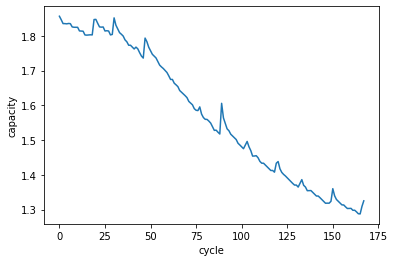

In [49]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.ylabel('capacity')
plt.xlabel('cycle')
plt.show()

In [50]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [51]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

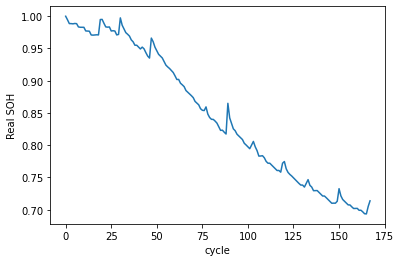

In [52]:
plt.plot(range(len(soh)),soh)
plt.ylabel('Real SOH')
plt.xlabel('cycle')
plt.show()

In [53]:
capacity=np.asarray(capacity)

In [54]:
type(capacity)

numpy.ndarray

In [55]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [56]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [57]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 0.4586
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0911
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0177
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0276
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0024


In [58]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [60]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 7ms/step


0.0001709204465512151

In [61]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.013


In [62]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01235261]
R2_score:  0.7728989031009594


Text(0.5, 0, 'cycle')

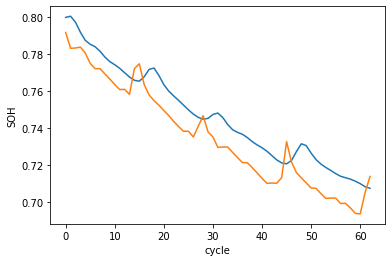

In [63]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.ylabel('SOH')
plt.xlabel('cycle')

In [64]:
preds = model.predict(X)

6/6 [==============================] - 0s 3ms/step


In [65]:
preds

array([[0.9681932 ],
       [0.96663857],
       [0.9663409 ],
       [0.9660858 ],
       [0.9648802 ],
       [0.96302736],
       [0.9617666 ],
       [0.96104693],
       [0.9596821 ],
       [0.9577335 ],
       [0.95609933],
       [0.9543427 ],
       [0.9522947 ],
       [0.9510602 ],
       [0.95085835],
       [0.9523744 ],
       [0.957956  ],
       [0.96560335],
       [0.96886975],
       [0.9667194 ],
       [0.9635287 ],
       [0.96163785],
       [0.95994943],
       [0.9579682 ],
       [0.95636064],
       [0.954632  ],
       [0.9542425 ],
       [0.95851654],
       [0.96397996],
       [0.9638511 ],
       [0.9593124 ],
       [0.9548829 ],
       [0.9515586 ],
       [0.9482615 ],
       [0.9445703 ],
       [0.94097346],
       [0.9381205 ],
       [0.93604296],
       [0.934326  ],
       [0.93325245],
       [0.9324783 ],
       [0.9303424 ],
       [0.92652947],
       [0.9245238 ],
       [0.92899   ],
       [0.93663466],
       [0.93871766],
       [0.934

Text(0.5, 0, 'cycle')

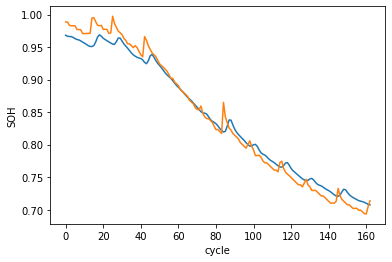

In [66]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.ylabel('SOH')
plt.xlabel('cycle')

Predicting Capacity

In [67]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [68]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 1.7850
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2795
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0622
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1887
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0314
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0679
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0322
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0106


In [69]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [70]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 6ms/step


0.00017457260322603

In [71]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.013


In [72]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01076347]
R2_score:  0.9326996567157718


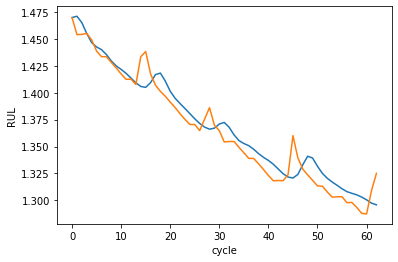

In [73]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.ylabel('RUL')
plt.xlabel('cycle')
plt.show()


In [74]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [75]:
preds

array([[1.786683 ],
       [1.7837162],
       [1.7831404],
       [1.7826399],
       [1.7804209],
       [1.7769488],
       [1.7745452],
       [1.7731588],
       [1.7706419],
       [1.7669884],
       [1.7638595],
       [1.7605969],
       [1.756758 ],
       [1.7543987],
       [1.7540009],
       [1.7569553],
       [1.7672862],
       [1.7815971],
       [1.7878957],
       [1.7839346],
       [1.7779092],
       [1.7742814],
       [1.7711504],
       [1.7674328],
       [1.7643479],
       [1.7611483],
       [1.7605313],
       [1.7682996],
       [1.7786095],
       [1.7785484],
       [1.7700113],
       [1.7616409],
       [1.7553498],
       [1.7491708],
       [1.7422246],
       [1.7354724],
       [1.7300766],
       [1.7261401],
       [1.7229472],
       [1.7208925],
       [1.7193918],
       [1.7154311],
       [1.708299 ],
       [1.704653 ],
       [1.7127498],
       [1.7270923],
       [1.7312179],
       [1.7234641],
       [1.7133884],
       [1.7054242],


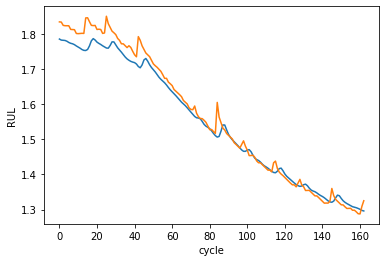

In [76]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.ylabel('RUL')
plt.xlabel('cycle')
plt.show()